In [51]:
#Claire Roush
#Machine Learning
#Classification algorithm on Adult Data set from https://archive.ics.uci.edu/ml/datasets/Adult
#Using Stochastic Gradient Descent Classifier and Random Forest Classifier from SciKitLearn

import pandas
import numpy as np
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection as cv
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

sgd = SGDClassifier(eta0=0.00000000001, n_iter=2000)
scaler = StandardScaler()
adult_data = pandas.read_csv('adult.csv')

#
adult_data.fillna(adult_data.mode().iloc[1:])
df_work = pandas.get_dummies(adult_data['WORKCLASS'])
df_ed = pandas.get_dummies(adult_data['EDUCATION'])
df_marital = pandas.get_dummies(adult_data['MARITAL'])
df_occ = pandas.get_dummies(adult_data['OCCUPATION'])
df_rel = pandas.get_dummies(adult_data['RELATIONSHIP'])
df_race = pandas.get_dummies(adult_data['RACE'])
df_sex = pandas.get_dummies(adult_data['SEX'])
df_co = pandas.get_dummies(adult_data['COUNTRY'])


adult_data = pandas.concat([adult_data, df_work], axis=1)
adult_data = adult_data.drop('WORKCLASS',1)
adult_data = pandas.concat([adult_data, df_ed], axis=1)
adult_data = adult_data.drop('EDUCATION',1)
adult_data = pandas.concat([adult_data, df_marital], axis=1)
adult_data = adult_data.drop('MARITAL',1)
adult_data = pandas.concat([adult_data, df_occ], axis=1)
adult_data = adult_data.drop('OCCUPATION',1)
adult_data = pandas.concat([adult_data, df_rel], axis=1)
adult_data = adult_data.drop('RELATIONSHIP',1)
adult_data = pandas.concat([adult_data, df_race], axis=1)
adult_data = adult_data.drop('RACE',1)
adult_data = pandas.concat([adult_data, df_sex], axis=1)
adult_data = adult_data.drop('SEX',1)
adult_data = pandas.concat([adult_data, df_co], axis=1)
adult_data = adult_data.drop('COUNTRY',1)


(adult_train, adult_test) = cv.train_test_split(adult_data, test_size = 0.2)

attribs = adult_data.columns.values.tolist()
attribs.remove('SALARY')

#normalize the data
scaler.fit(adult_train[attribs])
scaler.transform(adult_train[attribs])
scaler.transform(adult_test[attribs])

sgd.fit(adult_train[attribs],adult_train['SALARY'])
adult_predictions = sgd.predict(adult_test[attribs])
print(metrics.accuracy_score(adult_test["SALARY"], adult_predictions))

print(attribs)


0.784044016506
['AGE', 'FNLWGT', 'EDNUM', 'CAPITALG', 'CAPITALL', 'HPW', ' ', ' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' ', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Female', ' Male', ' ', ' Cambodia', ' Canada', ' China',

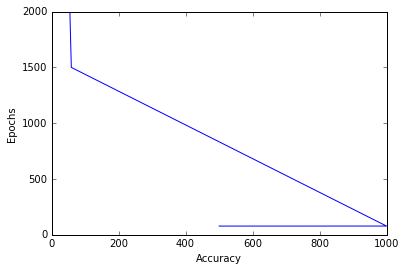

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

y = [500,1000,58.6,54.3]
x = [78.2,78.4,1500,2000]
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.plot(y,x)


## Classification ###

#### The Data ####
The Adult dataset, of Census Income dataset, from UCI Machine Learning Datasets predicts income (above or below $50k/year) based on several predictive attributes. Attributes used in prediction are:

| Attribute   | Values   
| ------------|:-----------------------------:|
| WORKCLASS   | Private/Self employed/...     |
| FNLWGT      | Final weight, numerical       |
| EDUCATION   | Bachelors/HS/...              |
| MARITAL     | Married/Divorced/...          |
| OCCUPATION  | Adm-clerical/Exec-manager/... |
| RELATIONSHIP| Not-in-family/Husband/Wife... |
| RACE        | White/Black/...               |
| SEX         | Male/Female                   |
| CAPITALG    | Capital gains, numerical      |
| CAPITALL    | Capital loss, numerical       |
| HPW         | Hours per week, numerical     |
| COUNTRY     | United States/Cuba/...        |
| SALARY      | >=50k/<50k                    |

##### Data Preparation #####

First, I did a find/replace in Sublime to replace all '?' characters with an empty space, and replace ```'<=50K'``` with 1 and ```'>50K'``` with 2. Next, I used the pandas ```mode()``` function to replace missing values with the mode of that column. I used pandas ```get_dummies``` to convert string categorical columns into numerical categorical columns, then dropped each respective "parent" columns, and normalized the data with StandardScaler.

### Stochastic Gradient Descent###


Without any setting customization, average accuracy was 0.64. With an ```eta0``` value of ```0.0000001```, accuracy rose to 0.77.

![eta0](epochValueGraphC.png)

Any further reduction of ```eta0``` produced reduced average accuracy values over 10 runs.

![eta0](epochValueGraphC2.png)


Other customization, such as setting ```learning_rate``` to ```optimal```, or ```constant```, increasing ```n_iter``` to values as low as 1 and as high as 10,000, and even customizing the ```alpha``` value, yielded similar results or worse results.

The optimal epoch value was 1000. Any more and accuracy suffered.

![eta0](epochValClass.png)


With ```learning_rate``` set to ```invscaling```, epochs at ```1000```, and ```eta0``` at ```0.0000001```, accuracy rose to 0.784 over 10 runs.

Perhaps the SGD algorithm isn't the best algorithm for this data set.

### Random Forest ###

Right "out of the box", the RandomForestClassifier yielded an average accuracy score of 0.843. With ```n_estimators``` set to 25, accuracy was an average of 84.7% over 10 runs, and 85.25% at 200.

![n_estimators](rfEstimators.png)

I thought that perhaps I could increase ```n_estimators``` while setting ```min_samples_split``` to a number that improved performance to get better accuracy. However, the accuracy increases were minimal. The highest accuracy was with 500 trees and ```min_samples_split``` at 15, at an average of 85.6% over 10 runs. Any more trees and the poor performance outweighed any negligible benefit.


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,min_samples_split=20)
rf.fit(adult_train[attribs],adult_train['SALARY'])
rf_predictions = rf.predict(adult_test[attribs])
print(metrics.accuracy_score(rf_predictions,adult_test['SALARY']))

0.839064649243
